### **LOADING LIBRARIES AND THE DATA FILE**

In [76]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [77]:
social = pd.read_csv("social_media_shares.csv")

### **EXPLANTORY DATA ANALYSIS**

In [78]:
social.head(5) #show 1st 5 rows on default

,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [79]:
social.describe()

,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31936.000000,31936.000000,31936.000000,31936.000000,31936.000000,31936.000000,31936.000000,31936.000000,31936.000000,31936.000000,...,31935.000000,31935.000000,31935.000000,31935.000000,31935.000000,31935.000000,31935.000000,31935.000000,31935.000000,31935.000000
mean,10.219564,545.492829,0.564232,1.018036,0.705651,11.115763,3.434369,4.735220,1.263308,4.617672,...,0.097575,0.771184,-0.261613,-0.521262,-0.110002,0.280516,0.074183,0.342067,0.155544,3485.280476
std,2.058822,473.829155,3.921517,5.826508,3.635793,11.253887,3.942814,8.636836,4.198700,0.626894,...,0.071978,0.230798,0.124921,0.283810,0.095771,0.323475,0.264293,0.189181,0.226184,12310.748606
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,245.000000,0.476190,1.000000,0.629966,5.000000,1.000000,1.000000,0.000000,4.487415,...,0.050000,0.600000,-0.328125,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,958.000000
50%,10.000000,403.000000,0.545392,1.000000,0.694737,8.000000,3.000000,1.000000,0.000000,4.664727,...,0.100000,0.800000,-0.253889,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1500.000000
75%,12.000000,707.000000,0.614793,1.000000,0.759259,14.000000,4.000000,5.000000,1.000000,4.853032,...,0.100000,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2900.000000
max,19.000000,8474.000000,701.000000,1042.000000,650.000000,187.000000,74.000000,128.000000,91.000000,7.695652,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [80]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31936 entries, 0 to 31935
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tokens_title                  31936 non-null  int64  
 1   tokens_content                31936 non-null  int64  
 2   unique_tokens                 31936 non-null  float64
 3   non_stop_words                31936 non-null  float64
 4   non_stop_unique_tokens        31936 non-null  float64
 5   hrefs                         31936 non-null  int64  
 6   self_refs                     31936 non-null  int64  
 7   imgs                          31936 non-null  int64  
 8   videos                        31936 non-null  int64  
 9   token_length                  31936 non-null  float64
 10  keywords                      31936 non-null  int64  
 11  lifestyle                     31936 non-null  int64  
 12  entertainment                 31936 non-null  int64  
 13  b

In [81]:
social.shape

(31936, 59)

In [82]:
social.isnull().sum()

tokens_title                    0
tokens_content                  0
unique_tokens                   0
non_stop_words                  0
non_stop_unique_tokens          0
hrefs                           0
self_refs                       0
imgs                            0
videos                          0
token_length                    0
keywords                        0
lifestyle                       0
entertainment                   0
bus                             0
socmed                          0
tech                            0
world                           0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_shares       0
monday        

### **PLOTTING**

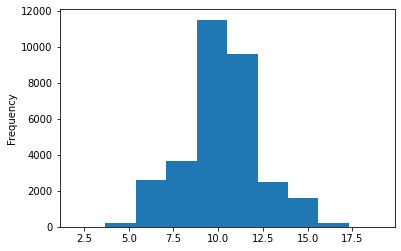

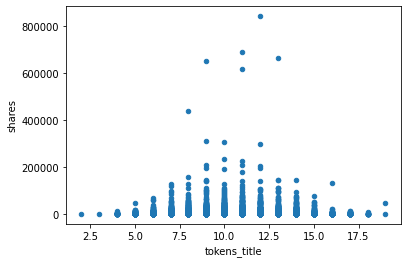

In [83]:
import matplotlib.pyplot as plt

# Histogram of the 'tokens_title' column
social['tokens_title'].plot(kind = 'hist')
plt.show()

# Scatter plot of 'tokens_title' and 'shares' columns
social.plot(x = 'tokens_title', y = 'shares', kind = 'scatter')
plt.show()

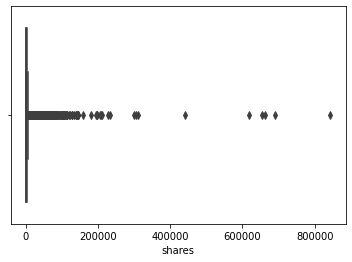

In [84]:
# Boxplot of the 'shares' column
sns.boxplot(x = 'shares', data = social)

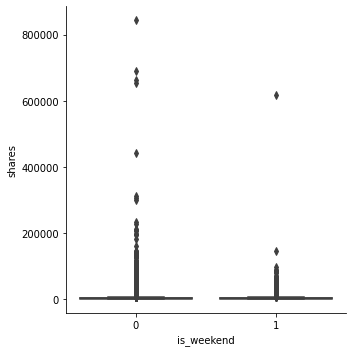

In [85]:
# Boxplot of 'shares' by 'weekend'
sns.catplot(x = 'is_weekend', y = 'shares', data = social, kind = 'box')

The Correlation Matrix and It's Plot

In [86]:
# Select the numeric columns
numeric_columns = social.select_dtypes(include = [np.number])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Print the correlation matrix
print(corr)

                              tokens_title  tokens_content  unique_tokens  \
tokens_title                      1.000000        0.018468      -0.003718   
tokens_content                    0.018468        1.000000      -0.005004   
unique_tokens                    -0.003718       -0.005004       1.000000   
non_stop_words                   -0.003463        0.014974       0.999645   
non_stop_unique_tokens           -0.003633       -0.001390       0.999898   
hrefs                            -0.048788        0.435839      -0.006756   
self_refs                         0.000317        0.311552       0.005046   
imgs                              0.010872        0.368154       0.020079   
videos                            0.058613        0.089750      -0.000787   
token_length                     -0.049641        0.094259       0.016533   
keywords                          0.003786        0.087634      -0.003841   
lifestyle                        -0.065572        0.036011      -0.002222   

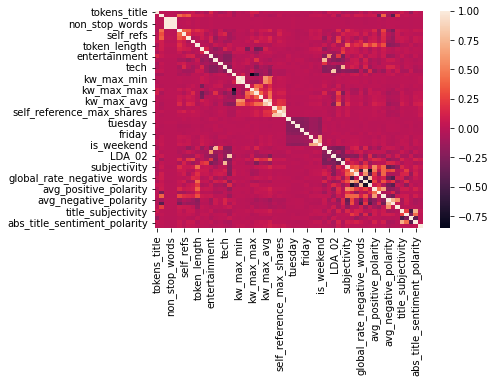

In [87]:
# Heatmap of the correlation matrix
sns.heatmap(corr)

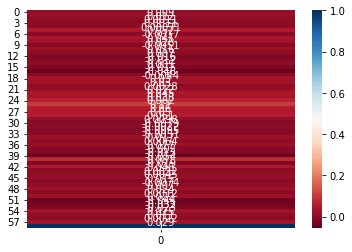

In [88]:
# Compute the correlations
corr_matrix = social.corr()['shares']

# Heatmap of the correlations
sns.heatmap(np.array(corr_matrix)[:, None], cmap = 'RdBu', annot = True)

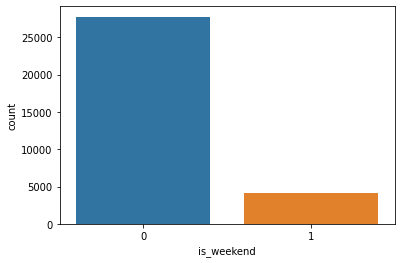

In [89]:
# Countplot of the 'weekend' column
sns.countplot(x = 'is_weekend', data = social)

### **REMOVING OUTLIERS**

In [90]:
def remove_outliers(df):
    df_clean = df.copy()
    
    # Loop over the columns of the dataframe
    for column in df.columns:
        # Calculate the interquartile range
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        # Skip column if the IQR is 0
        if iqr == 0:
            continue
        
        # Remove rows with values outside the range [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
        mask = (df[column] >= q1 - 1.5 * iqr) & (df[column] <= q3 + 1.5 * iqr)
        df_clean = df_clean[mask]
        
    # Reset the index of the new dataframe
    df_clean = df_clean.reset_index(drop = True)
    
    return df_clean

# Remove outliers from all columns
social_clean = remove_outliers(social)

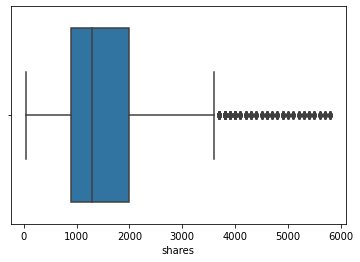

In [91]:
sns.boxplot(social_clean['shares'])

#### **Generating Train, Validation and Test Sets**

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def generate_sets(df, train_size=0.8, test_size=0.2):
    # Select the independent variables and the target column
    X = df.drop(columns=['shares'])
    y = df['shares']
    
    # Split the data into train, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, test_size = test_size, random_state = 42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = test_size / (train_size + test_size), random_state = 42)
    
    # Scale the training data
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
    
    # Scale the test data using the scalers fitted to the training data
    X_test_scaled = scaler_X.transform(X_test)
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
    
    # Scale the validation data using the scalers fitted to the training data
    X_val_scaled = scaler_X.transform(X_val)
    y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled



X_train, X_val, X_test, y_train, y_val, y_test = generate_sets(social)

#### **BUILDING THE MODEL**

##### **Neural Network**

In [93]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()

# Add a hidden layer with 15 units and ReLU activation
model.add(Dense(units = 15, activation = 'relu', input_shape = (X_train.shape[1],)))

# Add an output layer with 15 unit and linear activation
model.add(Dense(units = 15, activation = 'linear'))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


# Fit the model to the training data
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/10
639/639 [==============================] - 2s 2ms/step - loss: 1.1639 - val_loss: 0.5050
Epoch 2/10
639/639 [==============================] - 1s 2ms/step - loss: 1.0338 - val_loss: 0.4876
Epoch 3/10
639/639 [==============================] - 1s 2ms/step - loss: 1.0056 - val_loss: 0.4840
Epoch 4/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9918 - val_loss: 0.4812
Epoch 5/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9872 - val_loss: 0.4789
Epoch 6/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9864 - val_loss: 0.4773
Epoch 7/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9873 - val_loss: 0.4788
Epoch 8/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9901 - val_loss: 0.4785
Epoch 9/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9810 - val_loss: 0.4822
Epoch 10/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9781 - val_loss: 0.4805

#### **Hyperparamter Tuning**

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam


# Define a function that creates the model
def create_model(n_hidden_layers = 1, n_neurons = 32, learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim = X_train.shape[1], activation = 'relu'))
    
    for i in range(n_hidden_layers):
        model.add(Dense(n_neurons, activation='relu'))
    
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = learning_rate))
    
    return model

# Create a KerasClassifier object
model = KerasRegressor(build_fn = create_model)

# Define the hyperparameter space
param_distributions = {'n_hidden_layers': [1, 2, 3, 4],
                      'n_neurons': [16, 32, 64, 128],
                      'learning_rate': [0.001, 0.01, 0.1]}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator = model, param_distributions = param_distributions, n_iter = 10, cv = 10, verbose = 1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
639/639 [==============================] - 2s 2ms/step - loss: 1.0001
{'n_neurons': 16, 'n_hidden_layers': 2, 'learning_rate': 0.01}


In [95]:
# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Build the model with the best hyperparameters
model = create_model(n_hidden_layers = best_params['n_hidden_layers'], n_neurons = best_params['n_neurons'], learning_rate = best_params['learning_rate'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
639/639 [==============================] - 2s 2ms/step - loss: 0.9971
Epoch 2/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9904
Epoch 3/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9884
Epoch 4/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9858
Epoch 5/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9868
Epoch 6/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9813
Epoch 7/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9813
Epoch 8/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9821
Epoch 9/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9790
Epoch 10/10
639/639 [==============================] - 1s 2ms/step - loss: 0.9835


In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Replace all NaN values in X_test with 0
X_test = np.nan_to_num(X_test, 0)

# Replace all NaN values in y_test with 0
y_test = np.nan_to_num(y_test, 0)


# Get the model's predictions on the test data
predictions = model.predict(X_test)

# Compute the MSE, MAE, and R2
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

200/200 [==============================] - 1s 3ms/step
MSE: 0.35
MAE: 0.21
R2: 0.03


#### **Random Forest Regressor**

In [101]:
# Import the RandomForestRegressor class
from sklearn.ensemble import RandomForestRegressor

# Create an RFR object
rfr = RandomForestRegressor(n_jobs = -1)

# Fit the RFR to the training data
rfr.fit(X_train, np.ravel(y_train))

RandomForestRegressor(n_jobs=-1)

#### **Hyperparameter Tuning**

In [102]:
from hyperopt import tpe, hp, Trials, fmin
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


def objective(params):
   
   est = int(params['n_estimators'])
   md = int(params['max_depth'])
   msl = int(params['min_samples_leaf'])
   mss = int(params['min_samples_split'])
   
   model = RandomForestRegressor(n_estimators = est, max_depth = md, min_samples_leaf = msl, min_samples_split = mss)
   
   scores = cross_val_score(model, X_train, np.ravel(y_train), cv = 10, scoring = 'neg_mean_squared_error')
   score = -scores.mean()  # negating the mean MSE to minimize the objective

   return score

def optimize(trial):
   
   params = {'n_estimators':hp.uniform('n_estimators', 100, 500),
           'max_depth':hp.uniform('max_depth', 5, 20),
           'min_samples_leaf':hp.uniform('min_samples_leaf', 1, 5),
           'min_samples_split':hp.uniform('min_samples_split', 2, 6)}
   
   best = fmin(fn = objective, space = params, algo = tpe.suggest, trials = trial, max_evals = 1)
   
   return best

trial = Trials()
best = optimize(trial)

100%|██████████| 1/1 [14:45<00:00, 885.78s/it, best loss: 1.0076925474472225]


In [103]:
rfr = RandomForestRegressor(max_depth = round(best['max_depth']), min_samples_split = round(best['min_samples_split']), n_estimators = round(best['n_estimators']), n_jobs = -1)

rfr.fit(X_train, np.ravel(y_train))

RandomForestRegressor(max_depth=8, min_samples_split=3, n_estimators=345,
                      n_jobs=-1)

In [104]:
# Get the model's predictions on the test data
predictions = rfr.predict(X_test)

# Compute the R2 score
r2 = rfr.score(X_test, y_test)

# Print the R2 score
print(f'R2: {r2:.2f}')

R2: -0.27


#### **XGboost Regression**

In [105]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

def tune_model(X_train, y_train, X_val, y_val):
    # Define the parameter grid for the learning rate and maximum depth
    param_grid = {'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [3, 4, 5]}
    
    # Create an XGBoost regressor
    regressor = xgb.XGBRegressor(objective = 'reg:squarederror')
    
    # Create a RandomizedSearchCV object
    search = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)
    
    # Fit the random search object to the training data
    search.fit(X_train, y_train)
    
    # Get the best parameters
    best_params = search.best_params_
    
    # Print the best parameters
    print("Best parameters:", best_params)
    
    # Get the best model
    best_model = search.best_estimator_
    
    return best_model, best_params


In [106]:
# Get the best model and best parameters
best_model, best_params = tune_model(X_train, y_train, X_val, y_val)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

Best parameters: {'max_depth': 3, 'learning_rate': 0.1}


In [107]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 score:", r2)

Mean absolute error: 0.2282987780373023
R2 score: -0.5311582091681957


In [108]:
def find_important_features(X_train, y_train, column_names, n_features = 20):
    # Create a random forest regressor
    model = RandomForestRegressor(n_jobs = -1, random_state = 42)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Get the feature importances
    importances = model.feature_importances_
    
    # Sort the importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Get the top n_features most important features
    top_n = indices[:n_features]
    
    # Get the names of the most important features
    important_features = [column_names[i] for i in top_n]
    
    return important_features

important_features = find_important_features(X_train, y_train, social_clean.columns)

In [109]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def find_important_features(X_train, y_train, column_names, p_value=0.05):
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Get the p-values of the coefficients
    p_values = sm.OLS(y_train, X_train).fit().pvalues
    
    # Keep only the features with p-values less than the threshold
    important_features = [column_names[i] for i in range(len(p_values)) if p_values[i] < p_value]
    
    return important_features

# Find the important features
important_features = find_important_features(X_train, y_train, social_clean.columns, p_value=0.05)

# Print the important features
print(important_features)

['tokens_title', 'tokens_content', 'hrefs', 'self_refs', 'entertainment', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares']


In [110]:
def generate_new_sets(df, important_columns, train_size = 0.8, test_size = 0.2):
    # Select the independent variables and the target column
    X = df[important_columns]
    y = df['shares']
    
    # Split the data into train, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, test_size = test_size, random_state = 42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = test_size / (train_size + test_size), random_state = 42)
    
    # Scale the training data
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
    
    # Scale the test data using the scalers fitted to the training data
    X_test_scaled = scaler_X.transform(X_test)
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
    
    # Scale the validation data using the scalers fitted to the training data
    X_val_scaled = scaler_X.transform(X_val)
    y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled



X_train, X_val, X_test, y_train, y_val, y_test = generate_new_sets(social_clean, important_features)

In [111]:
# fitting
rfr.fit(X_train, y_train)

# Get the model's predictions on the test data
predictions = rfr.predict(X_test)

# Compute the R2 score
r2 = rfr.score(X_test, y_test)

# Print the R2 score
print(f'R2: {r2:.2f}')

R2: 0.07


In [113]:
# Get the best hyperparameters from the random search
best_parameters = random_search.best_params_

# Build the model with the best hyperparameters
model_new = create_model(n_hidden_layers = best_parameters['n_hidden_layers'], n_neurons = best_parameters['n_neurons'], learning_rate = best_parameters['learning_rate'])

# Fit the model to the training data
model_new.fit(X_train, y_train, epochs = 10, verbose = 1)

# Get the model's predictions on the test data
predictions = model_new.predict(X_test)

# Compute the MSE, MAE, and R2
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

Epoch 1/10
84/84 [==============================] - 1s 1ms/step - loss: 0.9793
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.9485
Epoch 3/10
84/84 [==============================] - 0s 1ms/step - loss: 0.9352
Epoch 4/10
84/84 [==============================] - 0s 1ms/step - loss: 0.9323
Epoch 5/10
84/84 [==============================] - 0s 1ms/step - loss: 0.9261
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.9079
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.9073
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 0.9077
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 0.8991
Epoch 10/10
27/27 [==============================] - 0s 1ms/step
MSE: 0.92
MAE: 0.70
R2: 0.05


In [119]:
regressor = xgb.XGBRegressor(objective = 'reg:squarederror', max_depth = best_params['max_depth'], learning_rate = best_params['learning_rate'])

regressor.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = regressor.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", round(mae, 5))
print("R2 score:", round(r2, 5))

Mean absolute error: 0.68834
R2 score: 0.08482
